In [1]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Module 1**

In [2]:
print("Hello World")

Hello World


In [3]:
# df = data frame
# indexing begins with 0 not 1
# pd.read_csv(path, separator, indexer)
# can use sep= to define separator for csv file: sep= '\t' for tab
# df displays all dataframe
# df.head() displays first lines, default is 5
df=pd.read_csv('/content/drive/My Drive/data_science_workshop/test_data.csv')
df.head()

,column0,column1,column2,column3,column4,sample_name
0,control,yes,0.25,0.10,0.00,sample1
1,case,yes,0.9,0.25,0.75,sample2
2,control,yes,0.43,0.23,0.02,sample3
3,case,no,c084,0.34,0.90,sample4


In [4]:
# index_col makes named column as indexer: index_col='sample_name'
df=pd.read_csv('/content/drive/My Drive/data_science_workshop/test_data.csv',index_col='sample_name')
df.head()


,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.9,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,c084,0.34,0.90


In [5]:
# df of specific columns
df1=df['column2']
df1.head()


sample_name
sample1    0.25
sample2     0.9
sample3    0.43
sample4    c084
Name: column2, dtype: object

In [6]:
# df of specific columns, more than one column requires double bracket
df2=df[['column2','column4']]
df2.head()

,column2,column4
sample_name,,
sample1,0.25,0.00
sample2,0.9,0.75
sample3,0.43,0.02
sample4,c084,0.90


In [7]:
# creation of new columns, math
df['column3+4']=df['column3']+df['column4']
df.head()

,column0,column1,column2,column3,column4,column3+4
sample_name,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10
sample2,case,yes,0.9,0.25,0.75,1.00
sample3,control,yes,0.43,0.23,0.02,0.25
sample4,case,no,c084,0.34,0.90,1.24


In [8]:
# strings can be "summed" (concatenated) with other strings only
df['column0+1']=df['column0']+'_'+df['column1']
df.head()

,column0,column1,column2,column3,column4,column3+4,column0+1
sample_name,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes
sample2,case,yes,0.9,0.25,0.75,1.00,case_yes
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes
sample4,case,no,c084,0.34,0.90,1.24,case_no


In [9]:
# if statements/locate loc() function
df.loc[df['column0']=='control','new_column0']=10
df.loc[df['column0']=='case','new_column0']=9
df.head()

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0
sample_name,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0
sample2,case,yes,0.9,0.25,0.75,1.00,case_yes,9.0
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0
sample4,case,no,c084,0.34,0.90,1.24,case_no,9.0


In [10]:
# loc() without new column works like a filter
df.loc[df['column0']=='control']

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0
sample_name,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0


In [11]:
# example loc() with numbers
df.loc[df['column3']>0.1]

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0
sample_name,,,,,,,,
sample2,case,yes,0.9,0.25,0.75,1.00,case_yes,9.0
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0
sample4,case,no,c084,0.34,0.90,1.24,case_no,9.0


In [12]:
# df.dtypes gives data types in data frame 
# if one cell is non-numerical like in column 2 then returns object for column 
df.dtypes

column0         object
column1         object
column2         object
column3        float64
column4        float64
column3+4      float64
column0+1       object
new_column0    float64
dtype: object

In [13]:
# can convert non-numeric to NaN then remove or replace
df['column2']=pd.to_numeric(df['column2'],errors='coerce')
df.head()

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0
sample_name,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0
sample2,case,yes,0.90,0.25,0.75,1.00,case_yes,9.0
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0
sample4,case,no,NaN,0.34,0.90,1.24,case_no,9.0


In [14]:
# drop NaN values
# df.dropna(how='all') drops rows of only NaN
# df.dropna(how='any') drops rows of atleast 1 NaN
# df.fillna(#) will replace NaNs with #
df3 = df.fillna(0.84)
df3.head()

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0
sample_name,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0
sample2,case,yes,0.90,0.25,0.75,1.00,case_yes,9.0
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0
sample4,case,no,0.84,0.34,0.90,1.24,case_no,9.0


In [15]:
df4=pd.read_csv('/content/drive/My Drive/data_science_workshop/test_data2.csv', index_col='sample_name')
df4.head()

,age
sample_name,
sample1,25
sample4,33
sample3,55


In [16]:
# merge data frames df.merge
#how =
#inner = row in both data sets
#left = row data from left df
#right = row identifiers in right df
#outer = identifiers in both
#all = all columns have to have NaN in row to be removed
# if more than one identical column, include all of them in the on= argument
df_full=df3.merge(df4,on='sample_name',how='inner')
df_full.head()

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0,age
sample_name,,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0,25
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0,55
sample4,case,no,0.84,0.34,0.90,1.24,case_no,9.0,33


In [17]:
#reset index
df_full=df_full.reset_index()
df_full.head()

,sample_name,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0,age
0,sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0,25
1,sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0,55
2,sample4,case,no,0.84,0.34,0.90,1.24,case_no,9.0,33


In [18]:
#set index
df_full=df_full.set_index('sample_name')
df_full.head()

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0,age
sample_name,,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0,25
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0,55
sample4,case,no,0.84,0.34,0.90,1.24,case_no,9.0,33


In [19]:
#group rows by column by creating a categorical column using conditionals
df_full.loc[df_full['age']>25,'age_cat']='gt10'
df_full.loc[df_full['age']<=25,'age_cat']='lt10'
df_full.head()

,column0,column1,column2,column3,column4,column3+4,column0+1,new_column0,age,age_cat
sample_name,,,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,0.10,control_yes,10.0,25,lt10
sample3,control,yes,0.43,0.23,0.02,0.25,control_yes,10.0,55,gt10
sample4,case,no,0.84,0.34,0.90,1.24,case_no,9.0,33,gt10


In [20]:
#Grouping rows based on a single column
new_group=df_full.groupby('column0').mean()
new_group.head()

,column2,column3,column4,column3+4,new_column0,age
column0,,,,,,
case,0.84,0.340,0.90,1.240,9.0,33
control,0.34,0.165,0.01,0.175,10.0,40


In [21]:
#Grouping rows based multiple columns
new_group=df_full.groupby(['column0','age_cat']).mean()
new_group.head()

column2  column3  column4  column3+4  new_column0  age
column0 age_cat                                                        
case    gt10        0.84     0.34     0.90       1.24          9.0   33
control gt10        0.43     0.23     0.02       0.25         10.0   55
        lt10        0.25     0.10     0.00       0.10         10.0   25

In [22]:
# Write to CSV file
df_full.to_csv('/content/drive/My Drive/data_science_workshop/test_data_full.csv')
df_group=df_full.groupby('column0').mean()
df_group.to_csv('/content/drive/My Drive/data_science_workshop/test_data_group.csv')

# **Module 2 - Graphs**

In [23]:
# import seaborn - library for visualization
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
# load an example data set using seaborn (generic available tips data)
categorical_data = sns.load_dataset('tips')
categorical_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


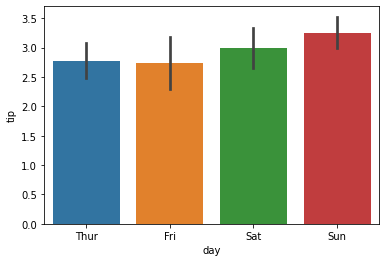

In [25]:
# draw bar blot grouped by a category
sns.barplot(data=categorical_data,x='day',y='tip')

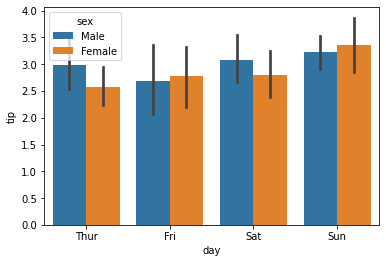

In [26]:
# using a nested category
sns.barplot(data=categorical_data,x='day',y='tip', hue='sex')

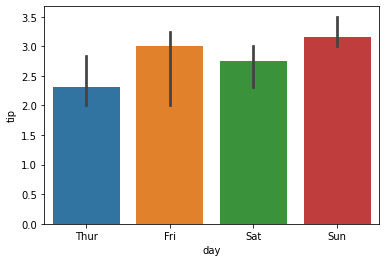

In [27]:
# using median instead of mean
# numpy is a library for python to include math functions - must be imported
import numpy as np
sns.barplot(data=categorical_data,x='day',y='tip', estimator=np.median)

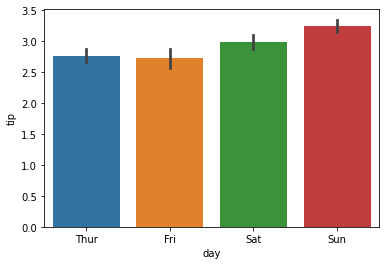

In [28]:
# error bars are fpr 95% CI, change CI with ci=
sns.barplot(data=categorical_data,x='day',y='tip',ci=50)

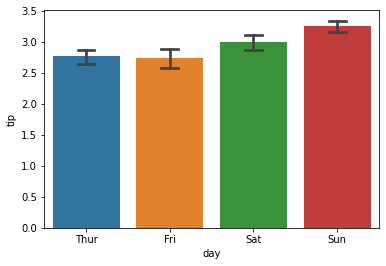

In [29]:
# change error bar to standard deviation, and add caps to the bars with capsize
sns.barplot(data=categorical_data,x='day',y='tip',ci=50, capsize=0.2)


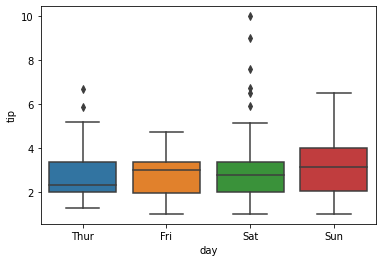

In [30]:
# box plots
sns.boxplot(data=categorical_data,x='day',y='tip')

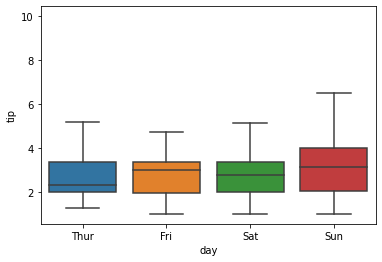

In [31]:
# fliersize changes points size, setting to 0 hides them
sns.boxplot(data=categorical_data,x='day',y='tip', fliersize=0)

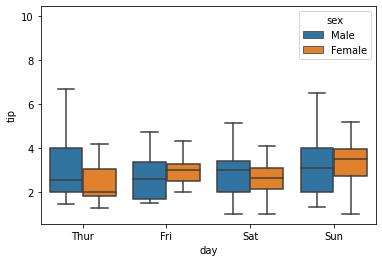

In [32]:
# nested boxplot
sns.boxplot(data=categorical_data,x='day',y='tip', fliersize=0, hue='sex')

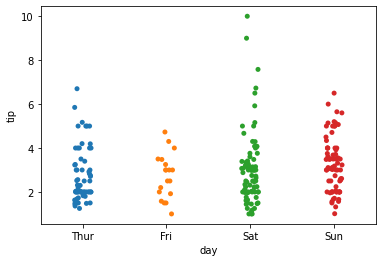

In [33]:
# strip plots - shows sample size and distribution not estimators(mean/median)
sns.stripplot(data=categorical_data,x='day',y='tip')

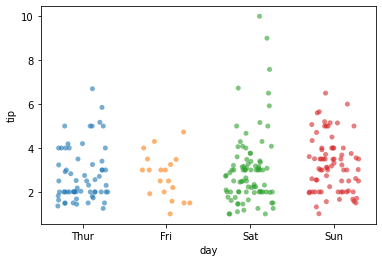

In [34]:
# strip plots can overlap points if you have many
# jitter spreads them horizontally more
# alpha controls transparency and can help see overlaps better
sns.stripplot(data=categorical_data,x='day',y='tip', jitter=0.3, alpha=0.6)

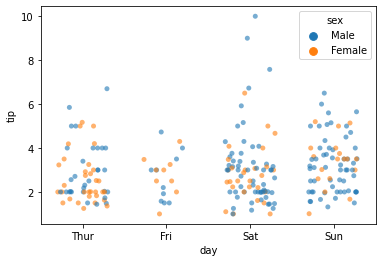

In [35]:
# strip plot with nested group
sns.stripplot(data=categorical_data,x='day',y='tip', jitter=0.3, alpha=0.6, hue='sex')

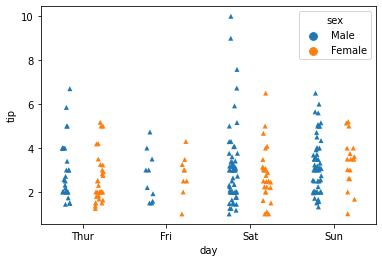

In [36]:
# dodge will separate will separate hue
# many options for strip plots
# can change marker and size
sns.stripplot(data=categorical_data,x='day',y='tip',marker='^',size=5,hue='sex', dodge=True)

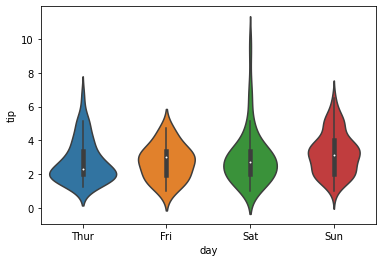

In [37]:
# violin plot
sns.violinplot(data=categorical_data,x='day',y='tip')

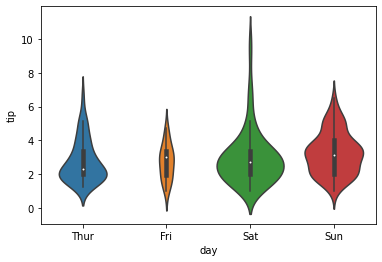

In [38]:
# violin plot with relative sample size for thickness
sns.violinplot(data=categorical_data,x='day',y='tip', scale='count')

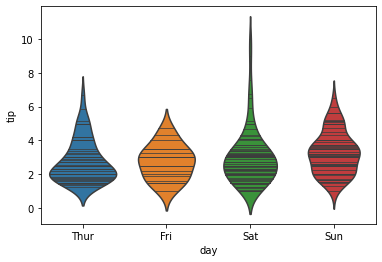

In [39]:
# violin plot showing inner boxplot, quartile, sticks, points, or nothing inside
sns.violinplot(data=categorical_data,x='day',y='tip',inner='stick')

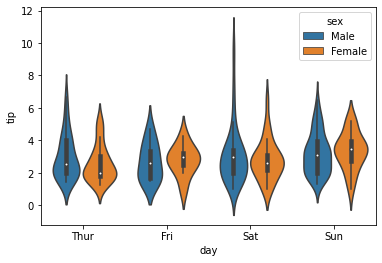

In [40]:
# violin plot nested
sns.violinplot(data=categorical_data,x='day',y='tip', hue='sex')

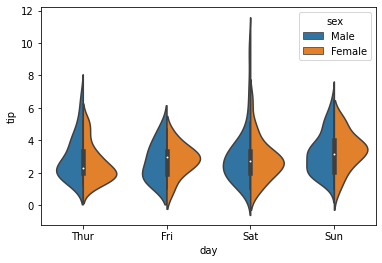

In [41]:
# violin plot with split nested 
sns.violinplot(data=categorical_data,x='day',y='tip',hue='sex',split='True')

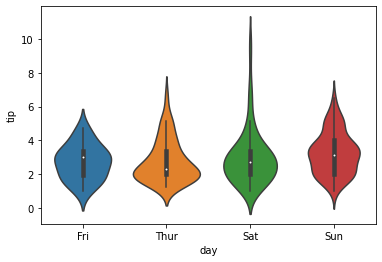

In [42]:
# violin plot with controlled order of x varibale
x_order = ['Fri','Thur','Sat','Sun']
sns.violinplot(data=categorical_data,x='day',y='tip', order=x_order)

In [43]:
#create a dictionary data structure for storing objects with vlaues
color_dict=dict({'Thur':'purple','Fri':'orange','Sat':'brown','Sun':'grey'})

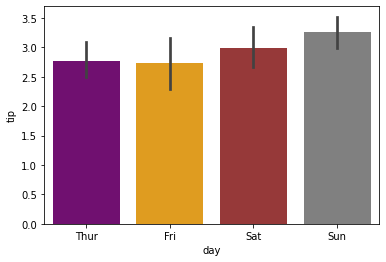

In [44]:
#use dictionary to make plot
sns.barplot(data=categorical_data,x='day',y='tip',palette=color_dict)

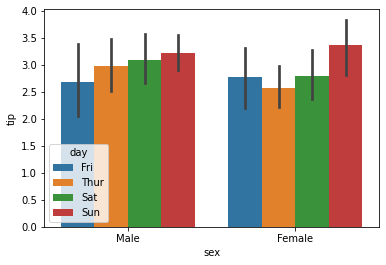

In [45]:
#use hue order to change order of hue
sns.barplot(data=categorical_data,x='sex',y='tip',hue_order=x_order,hue='day')

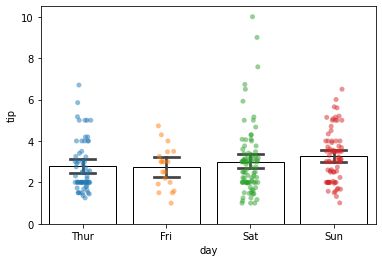

In [46]:
#combination of plots bar plot with strip plot
# capsize makes error bars more visible
# alpha adjust transparency
sns.barplot(data=categorical_data,x='day',y='tip',edgecolor='black',facecolor='white',capsize=.3)
sns.stripplot(data=categorical_data,x='day',y='tip',alpha=0.5)

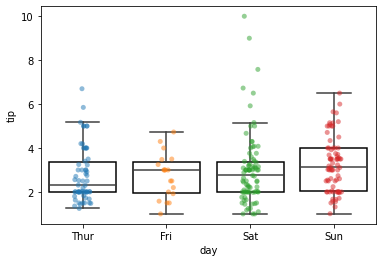

In [47]:
#combination of plots bar plot with strip plot
# capsize makes error bars more visible
# alpha adjust transparency
sns.boxplot(data=categorical_data,x='day',y='tip',fliersize=0,boxprops=dict({'edgecolor':'black','facecolor':(1,1,1,0)}))
sns.stripplot(data=categorical_data,x='day',y='tip',alpha=0.5)

In [48]:
#relational plot compare two variables
#load mpg data set 
relational_data=sns.load_dataset('mpg')
relational_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


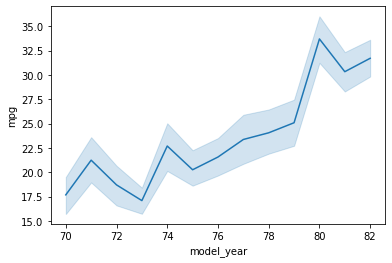

In [49]:
#lineplots compare means or medians over span of x-axis
sns.lineplot(data=relational_data,x='model_year',y='mpg')

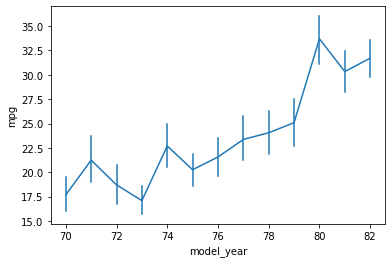

In [50]:
#add error bars with err_style
sns.lineplot(data=relational_data,x='model_year',y='mpg',err_style='bars')

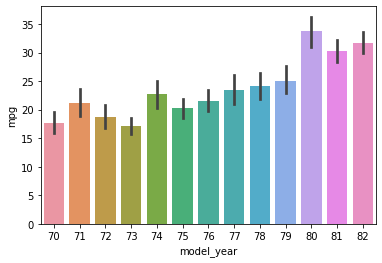

In [51]:
# line plots can be put as categorical plots bar, strip, box, or  violin
# can also adjust CI or Hue
sns.barplot(data=relational_data,x='model_year',y='mpg')

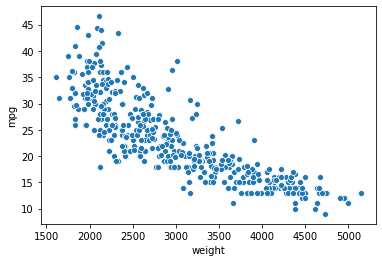

In [52]:
#scatter plots for 2 numeric variables
sns.scatterplot(data=relational_data,x='weight',y='mpg')

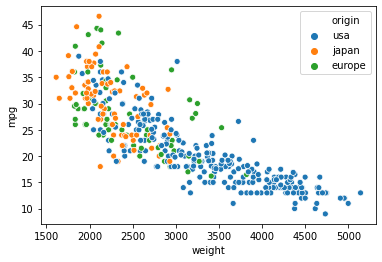

In [53]:
#scatter plots for 2 numeric variables with hue
sns.scatterplot(data=relational_data,x='weight',y='mpg',hue='origin')

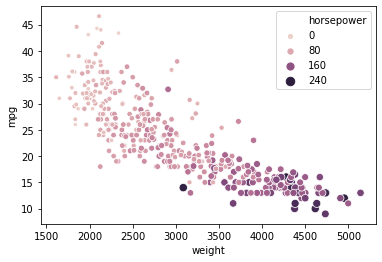

In [54]:
#scatter plots for 2 numeric variables and size adjusted by variable
sns.scatterplot(data=relational_data,x='weight',y='mpg',hue='horsepower',size='horsepower')

In [55]:
#heatmap display rectangular data, only able to show size, median, or mean
#load test data flights
matrix_data=sns.load_dataset('flights')
matrix_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [56]:
#pandas pivot table to make multideimensional summary of data
matrix_data=matrix_data.pivot('month','year','passengers')
matrix_data.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


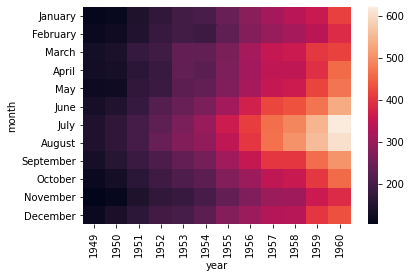

In [57]:
#heatmap
sns.heatmap(data=matrix_data)

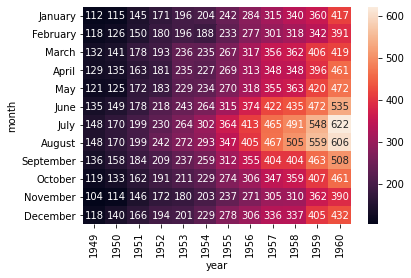

In [58]:
#heatmap with raw values and fmt to change significant values
sns.heatmap(data=matrix_data,annot=True, fmt='d')

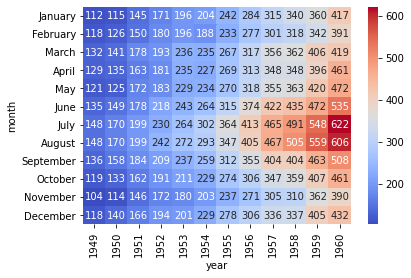

In [59]:
#heatmap with premade color palettes
sns.heatmap(data=matrix_data,annot=True, fmt='d',cmap='coolwarm')

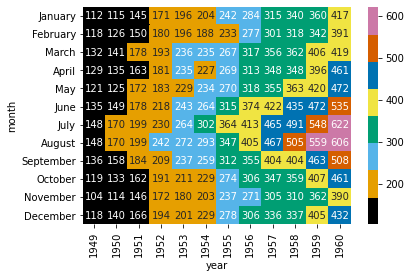

In [60]:
#heatmap with colorblind palette
cb_palette=['000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
sns.heatmap(data=matrix_data,annot=True, fmt='d',cmap=cb_palette)

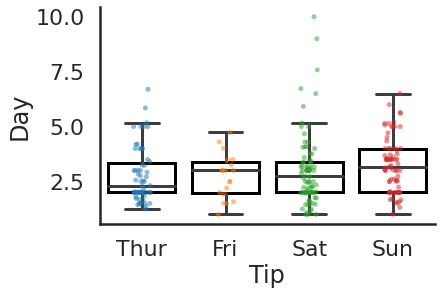

In [61]:
#change looks of plot
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.boxplot(data=categorical_data,x='day',y='tip',fliersize=0,boxprops=dict({'edgecolor':'black','facecolor':(1,1,1,0)}))
g=sns.stripplot(data=categorical_data,x='day',y='tip',alpha=.5)
g.set(xlabel='Tip',ylabel='Day')
g=sns.despine()

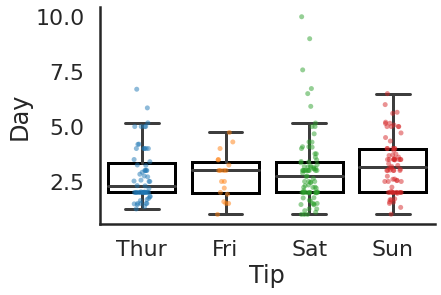

In [62]:
#saving plots to file savefig
#save as vector images for editable like pdf
#import matplotlib
#bbox inches tigh makes sure all elements of the plot are saved and not cut off when saving
import matplotlib.pyplot as plt
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.boxplot(data=categorical_data,x='day',y='tip',fliersize=0,boxprops=dict({'edgecolor':'black','facecolor':(1,1,1,0)}))
g=sns.stripplot(data=categorical_data,x='day',y='tip',alpha=.5)
g.set(xlabel='Tip',ylabel='Day')
g=sns.despine()
plt.savefig("/content/drive/My Drive/data_science_workshop/boxplot.pdf",bbox_inches='tight')

# **Module 3 - UNIX**

In [63]:
#display current directory
!pwd

/content


In [64]:
# see files in directory
!ls

drive  gdrive  sample_data


In [65]:
# change directory cd
%cd /content/drive/My Drive/data_science_workshop

/content/drive/My Drive/data_science_workshop


In [66]:
# create new directory mkdir
!mkdir test


mkdir: cannot create directory ‘test’: File exists


In [67]:
# display manual
!man cd

CD(1POSIX)                 POSIX Programmer's Manual                CD(1POSIX)

PPRROOLLOOGG
       This  manual  page is part of the POSIX Programmer's Manual.  The Linux
       implementation of this interface may differ (consult the  corresponding
       Linux  manual page for details of Linux behavior), or the interface may
       not be implemented on Linux.

NNAAMMEE
       cd — change the working directory

SSYYNNOOPPSSIISS
       cd [[−L|−P]] [[_d_i_r_e_c_t_o_r_y]]

       cd −

DDEESSCCRRIIPPTTIIOONN
       The _c_d utility shall change the working directory of the current  shell
       execution  environment  (see _S_e_c_t_i_o_n _2_._1_2, _S_h_e_l_l _E_x_e_c_u_t_i_o_n _E_n_v_i_r_o_n_m_e_n_t)
       by executing the following steps in sequence. (In the following  steps,
       the  symbol  ccuurrppaatthh  represents an intermediate value used to simplify
       the description of the algorit

In [68]:
#* can be used as a wildcard
# cat opens entire file good for small
!cat test_data.csv

column0,column1,column2,column3,column4,sample_name
control,yes,0.25,0.1,0,sample1
case,yes,0.9,0.25,0.75,sample2
control,yes,0.43,0.23,0.02,sample3
case,no,c084,0.34,0.9,sample4


In [69]:
# head displays first ten lines, use -n to change that
!head -3 test_data.csv

column0,column1,column2,column3,column4,sample_name
control,yes,0.25,0.1,0,sample1
case,yes,0.9,0.25,0.75,sample2


In [70]:
# tail displays last ten lines
!tail -2 test_data.csv

control,yes,0.43,0.23,0.02,sample3
case,no,c084,0.34,0.9,sample4


In [71]:
# cp copy file, copy directory with -r
# mv move or rename file
# rm remove file
!cp test_data.csv test_data_new.csv
!cp test_data.csv test/
!cp -r test test2
!cp test_data.csv test/test_data_new.csv
!ls

 boxplot.pdf	  test_data3.csv        test_data_new.csv
 test		  test_data.csv        'Workshop Module Codes.ipynb'
 test2		  test_data_full.csv
 test_data2.csv   test_data_group.csv


# **Module 4 - GitHub**

In [73]:
# essential git commands: clone, add, commit, push, pull
# use ! before git and bash commands
# use % before bash commands to navigate through directories
%cd /content/drive/My Drive/data_science_workshop
!ls

/content/drive/My Drive/data_science_workshop
 boxplot.pdf	  test_data3.csv        test_data_new.csv
 test		  test_data.csv        'Workshop Module Codes.ipynb'
 test2		  test_data_full.csv
 test_data2.csv   test_data_group.csv


In [74]:
! git clone https://github.com/kahluwal/test_repo.git

Cloning into 'test_repo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [75]:
%cd test_repo
!ls

/content/drive/My Drive/data_science_workshop/test_repo
README.md


In [76]:
%cd notebooks
!cp /content/drive/My\ Drive/data_science_workshop/Workshop\ Module\ Codes.ipynb ./
!ls

[Errno 2] No such file or directory: 'notebooks'
/content/drive/My Drive/data_science_workshop/test_repo
README.md
